# World Happiness Report
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.
- GDP per Capita
- Family
- Life Expectancy
- Freedom
- Generosity
- Trust Government Corruption

# 1. Import Packages 

In [246]:
import os 
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [152]:
# some settings for displaying Pandas results
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

# 2. Load Data 

In [153]:
df_2015 = pd.read_csv('../project_3/data/2015.csv')
df_2016 = pd.read_csv('../project_3/data/2016.csv')
df_2017 = pd.read_csv('../project_3/data/2017.csv')
df_2018 = pd.read_csv('../project_3/data/2018.csv')
df_2019 = pd.read_csv('../project_3/data/2019.csv')

#### Ranking will depend on the score. The higher the score, the higher the rank.

## Rename columns 

In [159]:
df_2017.rename(columns = {'Happiness.Rank':'Happiness Rank',
                          'Happiness.Score':'Happiness Score',
                          'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)',
                          'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                          'Trust..Government.Corruption.' : 'Trust (Government Corruption)',
                           }, inplace = True)
df_2018.rename(columns = {'Overall rank' : 'Happiness Rank',
                          'Country or region' : 'Country',
                          'Score' : 'Happiness Score',
                          'Social support' : 'Family',
                          'GDP per capita' : 'Economy (GDP per Capita)',
                          'Healthy life expectancy' : 'Health (Life Expectancy)',
                          'Freedom to make life choices' :'Freedom',
                          'Perceptions of corruption' : 'Trust (Government Corruption)'
                          }, inplace = True)
df_2019.rename(columns = {'Overall rank' : 'Happiness Rank',
                          'Country or region' : 'Country',
                          'Score' : 'Happiness Score',
                          'Social support' : 'Family',
                          'GDP per capita' : 'Economy (GDP per Capita)',
                          'Healthy life expectancy' : 'Health (Life Expectancy)',
                          'Freedom to make life choices' :'Freedom',
                          'Perceptions of corruption' : 'Trust (Government Corruption)'
                          }, inplace = True)

In [160]:
country_region = df_2015.groupby('Country')['Region'].apply(list).to_dict()

## Filter necessary columns

In [83]:
selected_features = ['Happiness Rank', 'Country', 'Economy (GDP per Capita)','Family',
                     'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 
                     'Generosity', 'Happiness Score']

In [84]:
filtered_2015 = df_2015.filter(selected_features)
filtered_2016 = df_2016.filter(selected_features)
filtered_2017 = df_2017.filter(selected_features)
filtered_2018 = df_2018.filter(selected_features)
filtered_2019 = df_2019.filter(selected_features)

## Add 'Year' column into dataframe

In [86]:
filtered_2015.insert(0, "Year", 2015)
filtered_2016.insert(0, "Year", 2016)
filtered_2017.insert(0, "Year", 2017)
filtered_2018.insert(0, "Year", 2018)
filtered_2019.insert(0, "Year", 2019)

## Add 'Region' column into dataframe

In [ ]:
dict_region = filtered_2015.groupby(['Country'])['Region'].apply(list).to_dict()

In [ ]:
for df in [filtered_2017, filtered_2018, filtered_2019]:
    for i, row in df.iterrows():
        try:
            df.loc[(df['Country'].str.lower() == row['Country'].lower()), 'Region'] = dict_region[row['Country']][0]                    
        except Exception as e:
            continue

## Concatinate all DataFrame in one 

In [88]:
# Create dataset including all the data from all the years together.
df_summary = pd.concat([filtered_2015, filtered_2016, filtered_2017, filtered_2018, filtered_2019], 
                       sort = False, ignore_index=True)

In [89]:
df_summary.shape

(782, 10)

## Handle null values

In [90]:
df_summary.isnull().sum()

Year                             0
Happiness Rank                   0
Country                          0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
Happiness Score                  0
dtype: int64

In [91]:
df_summary[df_summary['Trust (Government Corruption)'].isna()]

,Year,Happiness Rank,Country,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
489,2018,20,United Arab Emirates,2.096,0.776,0.67,0.284,NaN,0.186,6.774


In [92]:
mean_trust_value = df_summary[df_summary['Country'] == 'United Arab Emirates']['Trust (Government Corruption)'].mean()
mean_trust_value

0.3119823909258842

In [93]:
df_summary.fillna(mean_trust_value, inplace=True)

# 3. Explore Data Analysis

## Finding Correlation between different columns with Happiness Score.

In [94]:
# Find correlations with the target and sort
correlations = df_summary.corr()['Happiness Score'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 Happiness Rank                  -0.9921
Year                             0.0071
Generosity                       0.1376
Trust (Government Corruption)    0.4000
Freedom                          0.5513
Family                           0.6488
Health (Life Expectancy)         0.7425
Economy (GDP per Capita)         0.7893
Happiness Score                  1.0000
Name: Happiness Score, dtype: float64

Most Negative Correlations:
 Happiness Rank                  -0.9921
Year                             0.0071
Generosity                       0.1376
Trust (Government Corruption)    0.4000
Freedom                          0.5513
Family                           0.6488
Health (Life Expectancy)         0.7425
Economy (GDP per Capita)         0.7893
Happiness Score                  1.0000
Name: Happiness Score, dtype: float64


In [186]:
df_summary.corr()

,Year,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
Year,1.0000,-0.0078,0.0198,0.3674,0.1303,0.0104,-0.1204,-0.1926,0.0071
Happiness Rank,-0.0078,1.0000,-0.7948,-0.6448,-0.7437,-0.5379,-0.3746,-0.1177,-0.9921
Economy (GDP per Capita),0.0198,-0.7948,1.0000,0.5860,0.7843,0.3405,0.3106,-0.0146,0.7893
Family,0.3674,-0.6448,0.5860,1.0000,0.5727,0.4204,0.1240,-0.0373,0.6488
Health (Life Expectancy),0.1303,-0.7437,0.7843,0.5727,1.0000,0.3407,0.2505,0.0106,0.7425
Freedom,0.0104,-0.5379,0.3405,0.4204,0.3407,1.0000,0.4566,0.2907,0.5513
Trust (Government Corruption),-0.1204,-0.3746,0.3106,0.1240,0.2505,0.4566,1.0000,0.3177,0.4000
Generosity,-0.1926,-0.1177,-0.0146,-0.0373,0.0106,0.2907,0.3177,1.0000,0.1376
Happiness Score,0.0071,-0.9921,0.7893,0.6488,0.7425,0.5513,0.4000,0.1376,1.0000


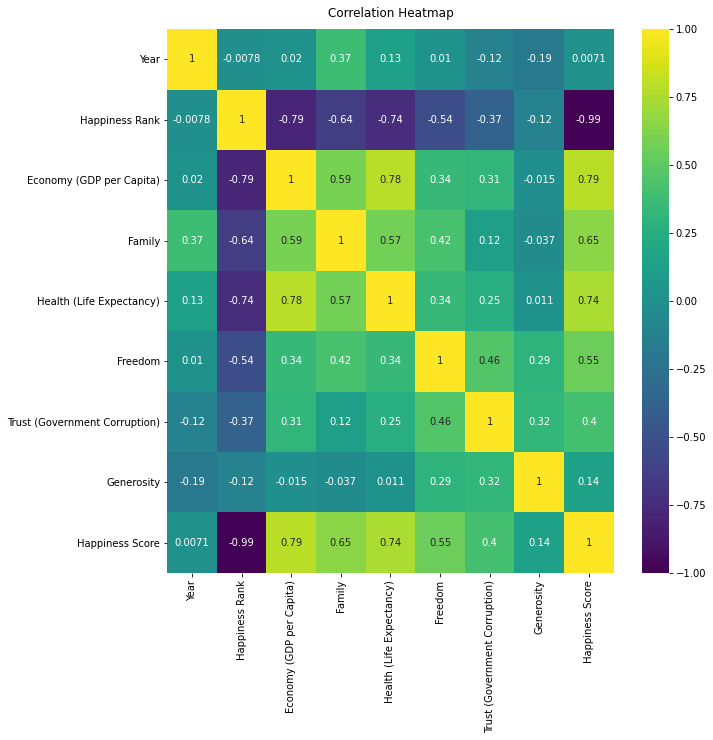

In [103]:
plt.figure(figsize=(10,10))
corr_mat = sns.heatmap(df_summary.corr(), vmin=-1, vmax=1, cmap="viridis", annot=True)
corr_mat.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From the above correlation, it can be inferred that Generosity and Trust in Government has less impact to the individual happiness. GDP and Health programs in the country has most impact to the individual happiness.



In [ ]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
         marker_line_width=1,
        locations = filtered_2019['Country'],
        locationmode = "country names",
        z = filtered_2019['Happiness Score'],
        text = filtered_2019['Country'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = 'Happiness Map',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

Text(0.5, 1.0, 'Happiness Score 2015-2019')

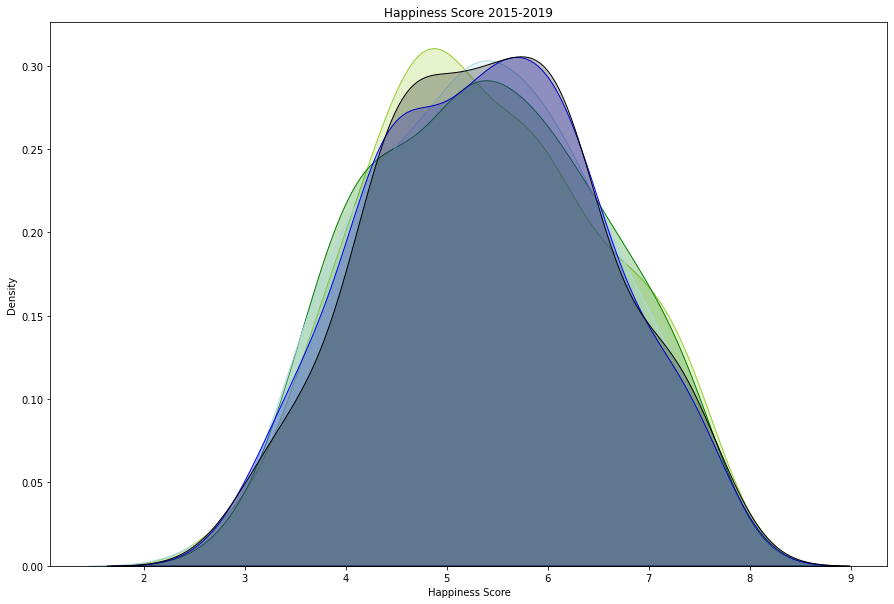

In [199]:
plt.figure(figsize=(15,10))
fig = sns.kdeplot(filtered_2015['Happiness Score'], shade=True, legend ='2015 happiness', color = 'yellowgreen', label='2015')
fig = sns.kdeplot(filtered_2016['Happiness Score'], shade=True, color = 'green', label='2016')
fig = sns.kdeplot(filtered_2017['Happiness Score'], shade=True, color = 'lightblue',label='2017')
fig = sns.kdeplot(filtered_2018['Happiness Score'], shade=True, color = 'blue',label='2018')
fig = sns.kdeplot(filtered_2019['Happiness Score'], shade=True, color = 'black',label='2019')
plt.title ('Happiness Score 2015-2019')


In [240]:
filtered_2019.loc[(filtered_2019['Country']=='Vietnam')]

,Year,Happiness Rank,Country,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
93,2019,94,Vietnam,0.741,1.346,0.851,0.543,0.073,0.147,5.175


In [241]:
df_top10_to_vietnam = filtered_2019.head(10).append(filtered_2019.loc[(filtered_2019['Country']=='Vietnam')])
df_top10_to_vietnam.drop(columns=['Happiness Rank','Year'], inplace=True)

In [242]:
df_top10_to_vietnam

,Country,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,Finland,1.340,1.587,0.986,0.596,0.393,0.153,7.769
1,Denmark,1.383,1.573,0.996,0.592,0.410,0.252,7.600
2,Norway,1.488,1.582,1.028,0.603,0.341,0.271,7.554
3,Iceland,1.380,1.624,1.026,0.591,0.118,0.354,7.494
4,Netherlands,1.396,1.522,0.999,0.557,0.298,0.322,7.488
5,Switzerland,1.452,1.526,1.052,0.572,0.343,0.263,7.480
6,Sweden,1.387,1.487,1.009,0.574,0.373,0.267,7.343
7,New Zealand,1.303,1.557,1.026,0.585,0.380,0.330,7.307
8,Canada,1.365,1.505,1.039,0.584,0.308,0.285,7.278
9,Austria,1.376,1.475,1.016,0.532,0.226,0.244,7.246


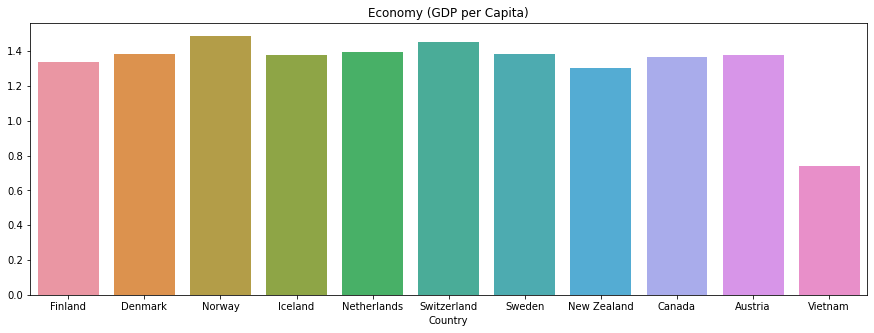

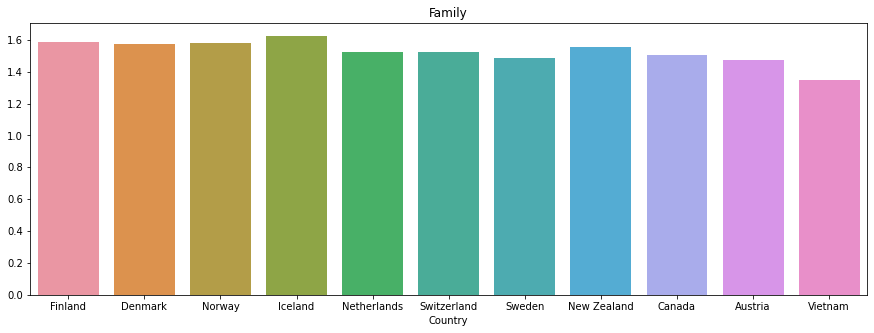

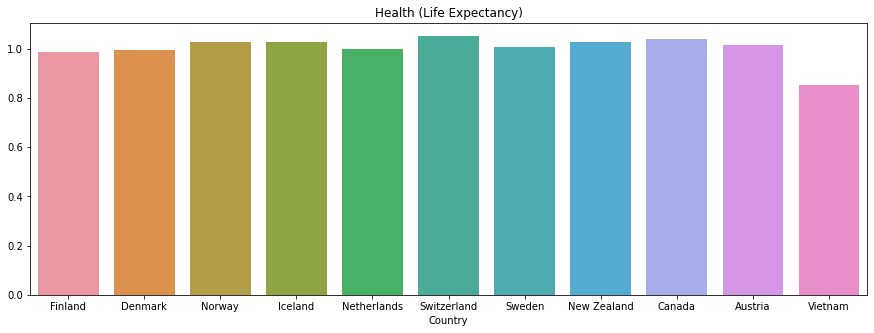

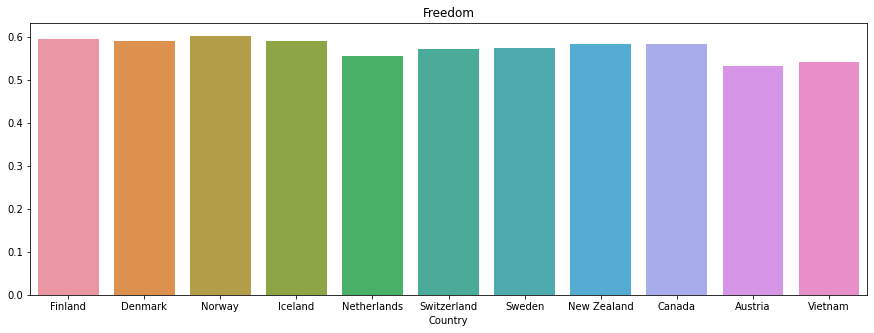

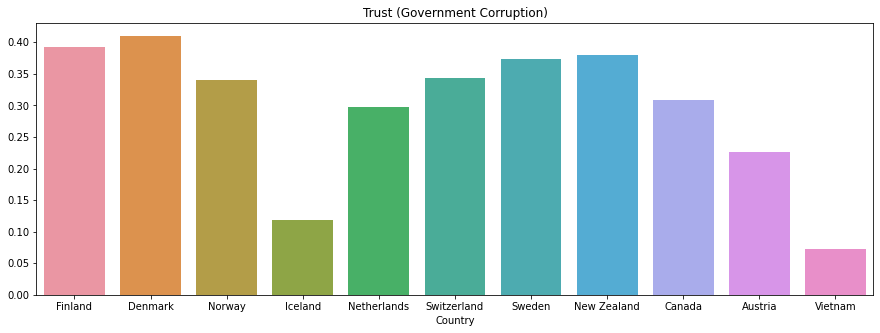

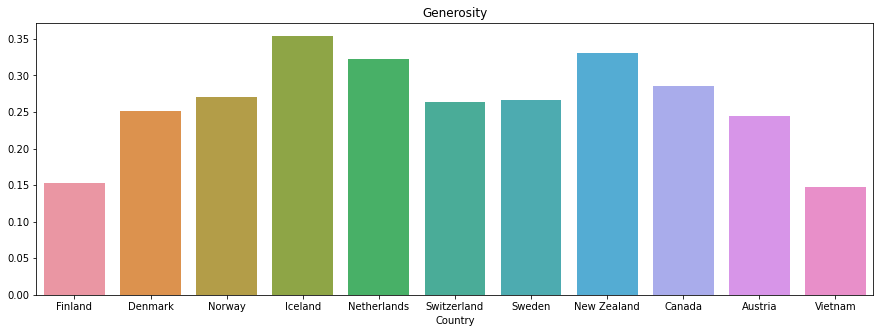

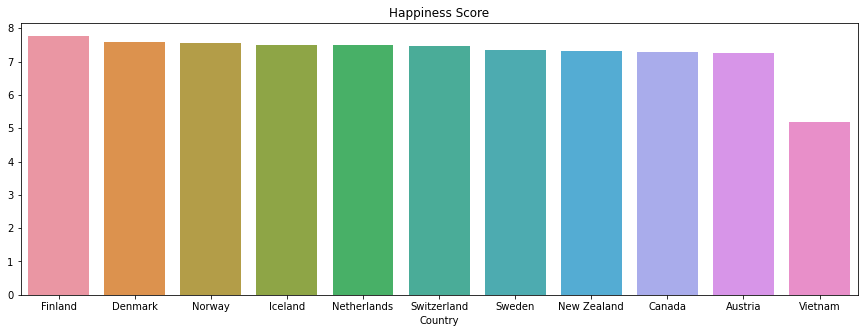

In [249]:
for a in df_top10_to_vietnam.columns:
    if a != 'Country':
        plt.figure(figsize=(15,5))
        sns.barplot(x=df_top10_to_vietnam['Country'],y=df_top10_to_vietnam[a].values)
        plt.title(a)
        plt.show()